In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import re



In [63]:
# Charger les bases de données pour les différentes années
data_2018 = pd.read_csv('data_2018.csv')
data_2019 = pd.read_csv('data_2019.csv')
data_2020 = pd.read_csv('data_2020.csv')

data_2018.info
data_2019.info
data_2020.info

#On a une colonne vide en 2020 qui va sauter quand on va verifier les correlations

<bound method DataFrame.info of      sno  district        mandal       village    lat_gis   long_gis   gwl  \
0      1  ADILABAD      Adilabad      Adilabad  19.668300  78.524700  7.10   
1      2  ADILABAD   Bazarhatnur   Bazarhatnur  19.458888  78.350833  3.35   
2      3  ADILABAD   Gudihatnoor   Gudihatnoor  19.525555  78.512222  5.05   
3      4  ADILABAD       Jainath       Jainath  19.730555  78.640000  2.10   
4      5  ADILABAD       Narnoor       Narnoor  19.495665  78.852654  1.38   
..   ...       ...           ...           ...        ...        ...   ...   
363  375   YADADRI  S.Narayanpur  S.Narayanpur  17.144719  78.860010  9.90   
364  376   YADADRI   Thurkapally    Gandamalla  17.733101  78.853831  5.74   
365  377   YADADRI     Valigonda    T. somaram  17.399953  78.952290  1.72   
366  378   YADADRI     Valigonda   Vemulakonda  17.347782  79.143433  1.65   
367  379   YADADRI       Y.Gutta    Mallapuram  17.633555  78.911638  4.92   

                season  Unnamed

In [64]:

# Dictionnaire de correspondance entre les valeurs actuelles et les nouvelles valeurs
mapping = {
    'C2S1': 'Moderate',
    'C3S1': 'Poor',
    'C4S2': 'Bad',
    'C4S1': 'Bad',
    'C3S2': 'Poor',
    'C4S4': 'Bad',
    'C4S3': 'Bad',
    'C1S1': 'Good',
    'C3S4': 'Bad',
    'C3S3': 'Poor',
    'C2S2': 'Moderate',
}

# Modifier les valeurs de la colonne "Classification" dans chaque base de données
data_2018['Classification'] = data_2018['Classification'].replace(mapping)
data_2019['Classification'] = data_2019['Classification'].replace(mapping)
data_2020['Classification'] = data_2020['Classification'].replace(mapping)

In [65]:
# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Fonction pour encodage des étiquettes de classe en valeurs numériques
def encode_labels(data):
    data['Classification'] = label_encoder.fit_transform(data['Classification'])

# Encodage des étiquettes de classe en valeurs numériques
encode_labels(data_2018)
encode_labels(data_2019)
encode_labels(data_2020)

/tmp/ipykernel_17951/339763410.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


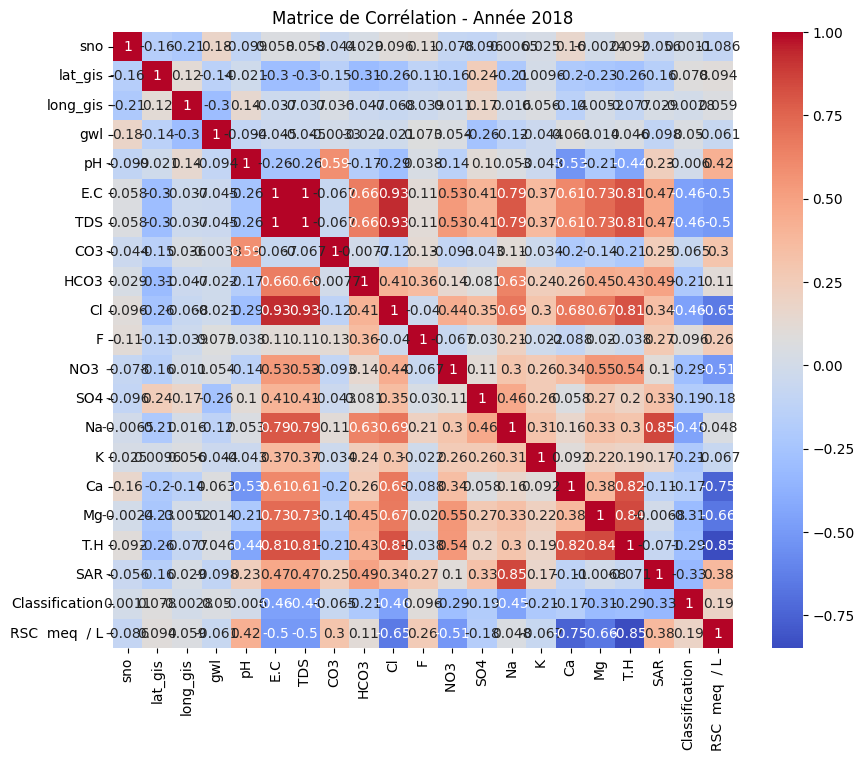

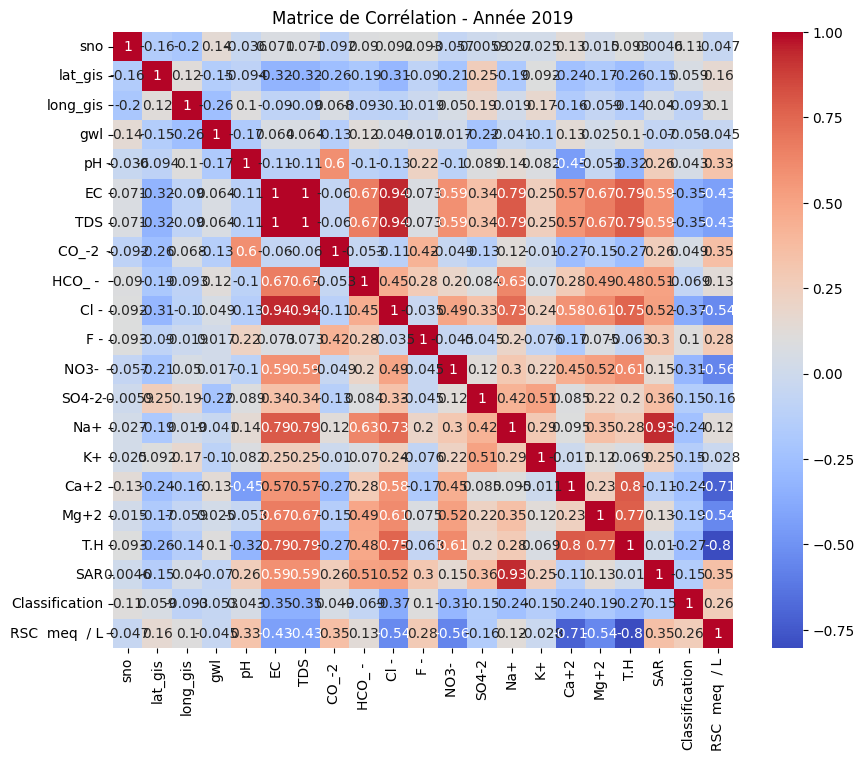

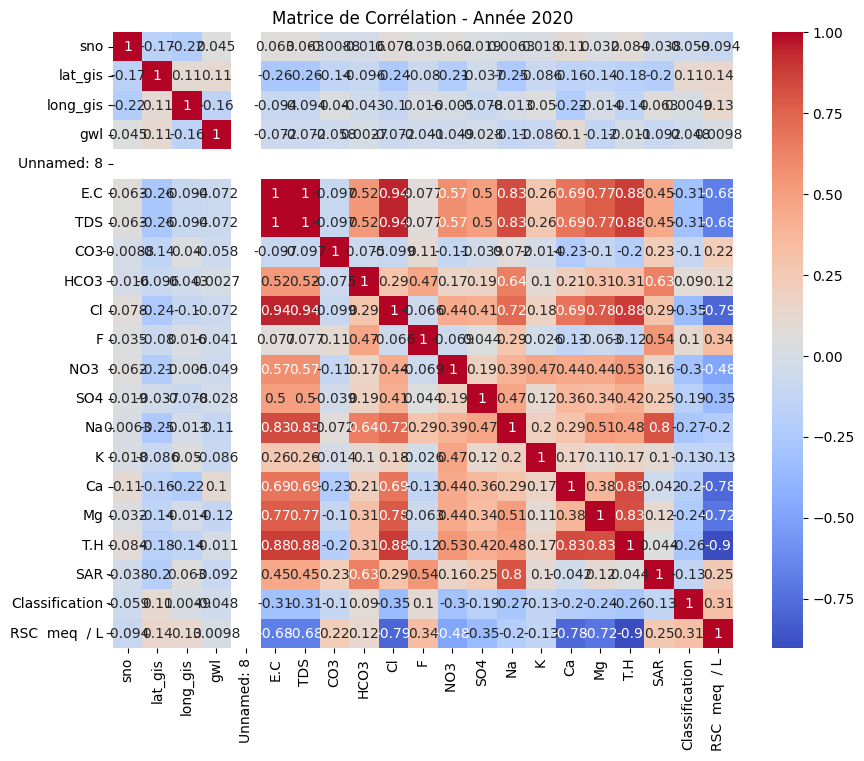

In [66]:
# Fonction pour afficher la matrice de corrélation
def plot_correlation_matrix(data, year):
    # Matrice de corrélation
    correlation_matrix = data.corr()

    # Tracé de la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Matrice de Corrélation - Année {year}")
    plt.show()

# Afficher les matrices de corrélation pour chaque année
plot_correlation_matrix(data_2018, '2018')
plot_correlation_matrix(data_2019, '2019')
plot_correlation_matrix(data_2020, '2020')

/tmp/ipykernel_17951/3011944606.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


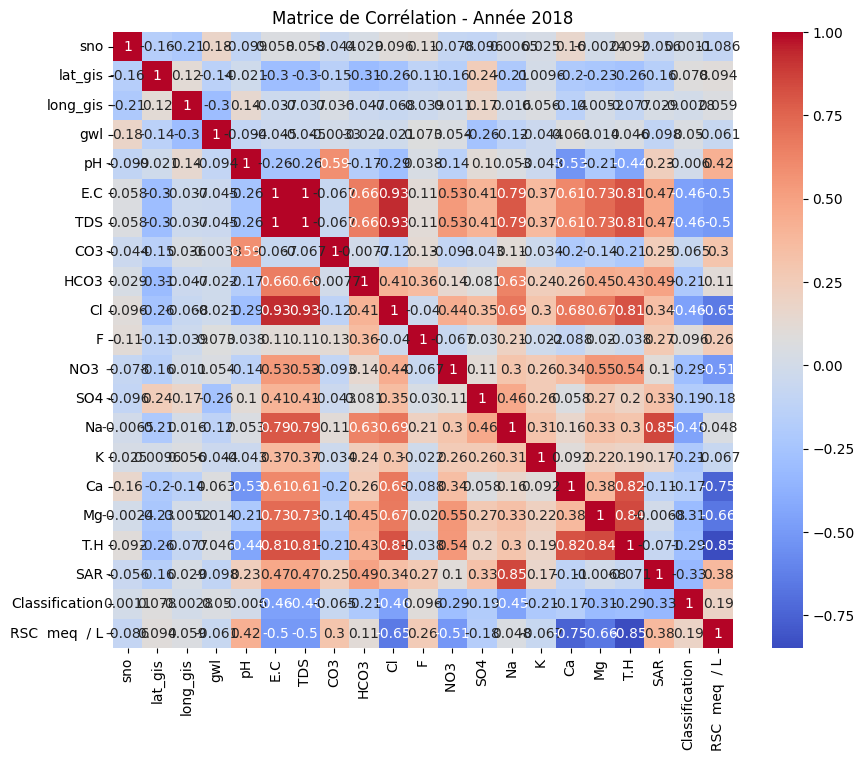

Les 10 fonctionnalités les plus corrélées avec la cible - Année 2018:
Index(['Cl', 'E.C', 'TDS', 'Na', 'SAR', 'Mg', 'T.H', 'NO3 ', 'K', 'HCO3'], dtype='object')


/tmp/ipykernel_17951/3011944606.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


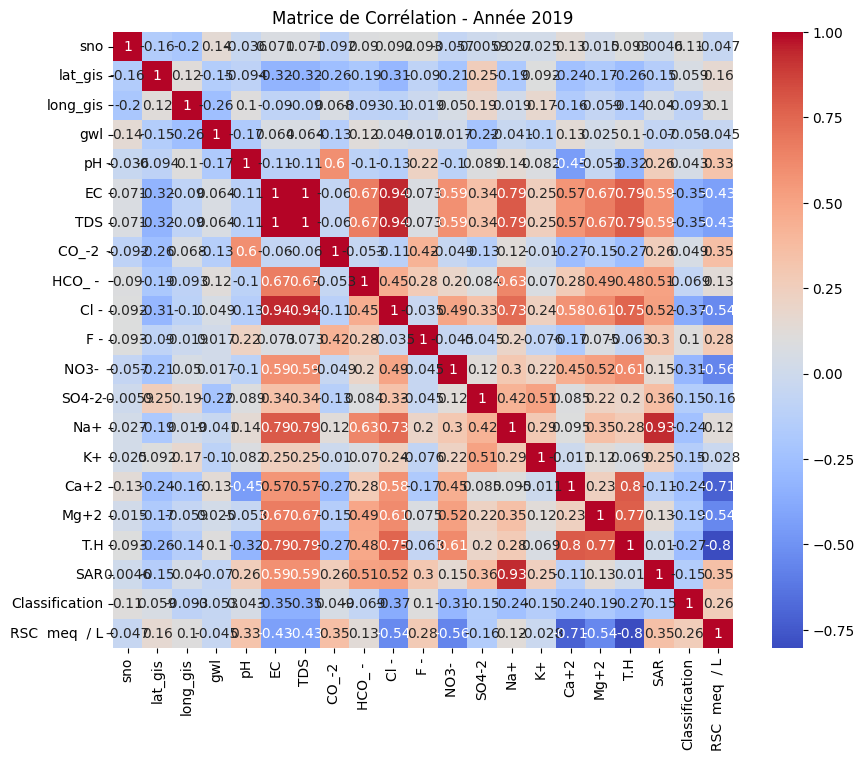

Les 10 fonctionnalités les plus corrélées avec la cible - Année 2019:
Index(['Cl -', 'TDS', 'EC', 'NO3- ', 'T.H', 'RSC  meq  / L', 'Na+', 'Ca+2',
       'Mg+2', 'SAR'],
      dtype='object')


/tmp/ipykernel_17951/3011944606.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


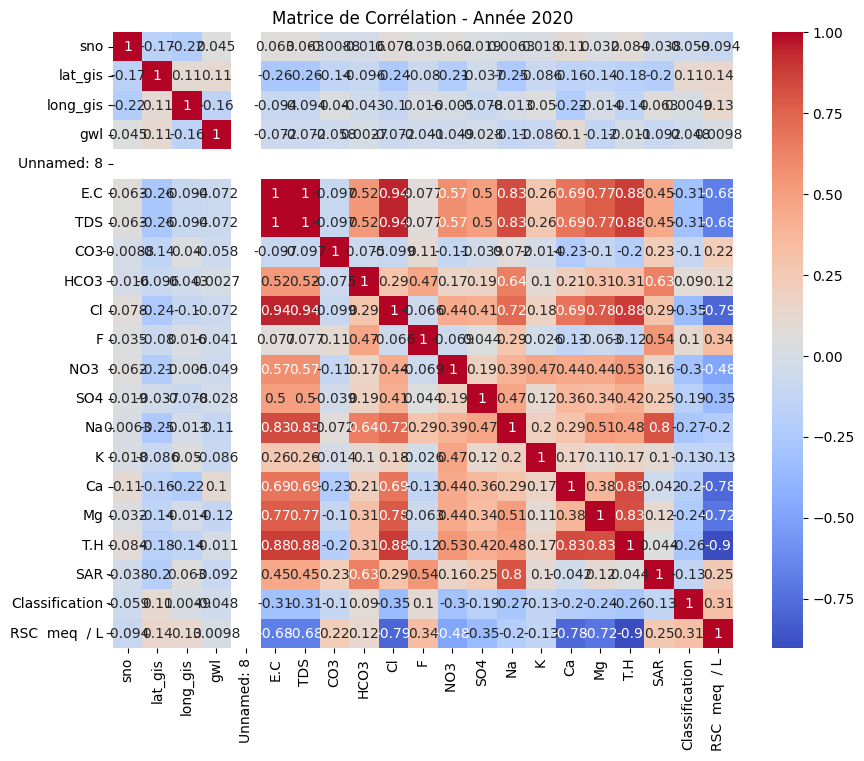

Les 10 fonctionnalités les plus corrélées avec la cible - Année 2020:
Index(['Cl', 'TDS', 'E.C', 'RSC  meq  / L', 'NO3 ', 'Na', 'T.H', 'Mg', 'Ca',
       'SO4'],
      dtype='object')


In [67]:
# Fonction pour sélectionner les 10 fonctionnalités les plus corrélées avec la cible
def select_top_correlated_features(data, year):
    # Matrice de corrélation
    correlation_matrix = data.corr()

    # Tracé de la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Matrice de Corrélation - Année {year}")
    plt.show()

    # Sélection des 10 fonctionnalités les plus corrélées avec la cible
    target_column = 'Classification'
    top_correlated_features = correlation_matrix[target_column].abs().nlargest(11).index
    top_correlated_features = top_correlated_features.drop(target_column)

    print(f"Les 10 fonctionnalités les plus corrélées avec la cible - Année {year}:")
    print(top_correlated_features)

# Sélection des fonctionnalités les plus corrélées pour chaque année
select_top_correlated_features(data_2018, '2018')
select_top_correlated_features(data_2019, '2019')
select_top_correlated_features(data_2020, '2020')

In [68]:
# Sélectionn des 10 fonctionnalités les plus corrélées avec "Classification"
def select_top_correlated_features(data):
    correlation_matrix = data.corr()
    target_column = 'Classification'
    top_correlated_features = correlation_matrix[target_column].abs().nlargest(11).index
    top_correlated_features = top_correlated_features.drop(target_column)
    columns_to_keep = ['Classification'] + top_correlated_features.tolist()
    return data[columns_to_keep]

# Remplacer les bases de données originales par les nouvelles bases de données sélectionnées
data_2018 = select_top_correlated_features(data_2018)
data_2019 = select_top_correlated_features(data_2019)
data_2020 = select_top_correlated_features(data_2020)

# Afficher les 10 premières lignes des nouvelles bases de données
print("Data 2018 selected:")
print(data_2018.head(10))
print("\nData 2019 selected:")
print(data_2019.head(10))
print("\nData 2020 selected:")
print(data_2020.head(10))

Data 2018 selected:
   Classification   Cl   E.C      TDS          Na       SAR       Mg  \
0               2   60   745   476.80   49.000000  1.273328   38.896   
1               3   80   921   589.44   42.000000  0.913166   63.206   
2               2   30   510   326.40   45.000000  1.319284   38.896   
3               2   10   422   270.08   27.000000  0.928155   19.448   
4               0  340  2321  1485.44  298.000000  5.682664   92.378   
5               3   60  1030   659.20   73.000000  1.721442   34.034   
6               3  330  2129  1362.56  162.000000  2.589608  126.412   
7               3   40   982   628.48   85.000000  2.133949   43.758   
8               0  290  2420  1548.80  321.000000  6.121308   97.240   
9               2   30   250   160.00   10.200213  0.443524    9.724   

          T.H        NO3      K        HCO3  
0  279.934211   42.276818   4.0  220.000000  
1  399.893092  100.659091   5.0  230.000000  
2  219.934211   41.471545   2.0  200.000000  
3  

/tmp/ipykernel_17951/2327778508.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
/tmp/ipykernel_17951/2327778508.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
/tmp/ipykernel_17951/2327778508.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [69]:
# Concaténer les bases de données en une seule
all_data = pd.concat([data_2018, data_2019, data_2020], ignore_index=True)

# Diviser les données en caractéristiques (X) et cible (y)
X = all_data.drop('Classification', axis=1)
y = all_data['Classification']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Créer l'imputeur
imputer = SimpleImputer(strategy='mean')  # Remplace les NaN par la moyenne

# Appliquer l'imputation sur X_train_scaled
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Créer le modèle RandomForest avec les données imputées
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement imputées
model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Faire des prédictions sur les données d'entraînement
y_train_pred = model.predict(X_train_imputed)

# Calculer l'accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Afficher l'accuracy
print("Accuracy:", accuracy)

Accuracy: 1.0


In [73]:
# Créer l'imputeur
imputer = SimpleImputer(strategy='mean')  # Remplace les NaN par la moyenne

# Appliquer l'imputation sur X_train_scaled
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Créer le modèle DecisionTreeClassifier avec les données imputées
model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur les données d'entraînement imputées
model.fit(X_train_imputed, y_train)

# Faire des prédictions sur les données d'entraînement
y_train_pred = model.predict(X_train_imputed)

# Calculer l'accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Afficher l'accuracy
print("Accuracy:", accuracy)

Accuracy: 1.0


In [74]:
# Créer l'imputeur
imputer = SimpleImputer(strategy='mean')  # Remplace les NaN par la moyenne

# Appliquer l'imputation sur X_train_scaled
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Créer le modèle SVC avec les données imputées
model = SVC(random_state=42)

# Entraîner le modèle sur les données d'entraînement imputées
model.fit(X_train_imputed, y_train)

# Faire des prédictions sur les données d'entraînement
y_train_pred = model.predict(X_train_imputed)

# Calculer l'accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Afficher l'accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9276018099547512
